<a href="https://colab.research.google.com/github/Beast-adarshyadav/parkinsons_spiral/blob/main/parkinsons_spiral%26wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating: drawings/spiral/test

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob
import numpy as np
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [117]:
x1  = '/content/spiral/training'
path1 = Path(x1)
path1.ls()
x2 = '/content/wave/training'
path2 = Path(x2)
path2.ls()

(#2) [Path('/content/wave/training/parkinson'),Path('/content/wave/training/healthy')]

In [120]:
np.random.seed(40)
data1 = ImageDataLoaders.from_folder(path1, train = '/content/spiral/training', valid_pct=0.2, # Removed 'spiral/' from the beginning of the path as it is already included in the path variable.
                                  item_tfms=[Resize(224)], # Resize images when loading them
                                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)], # Ensure all images are resized to 224x224
                                  size=224,bs=8,
                                  num_workers=4)
np.random.seed(40)
data2 = ImageDataLoaders.from_folder(path2, train = '/content/wave/training', valid_pct=0.2, # Removed 'spiral/' from the beginning of the path as it is already included in the path variable.
                                  item_tfms=[Resize(224)], # Resize images when loading them
                                  batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)], # Ensure all images are resized to 224x224
                                  size=224,bs=8,
                                  num_workers=4)

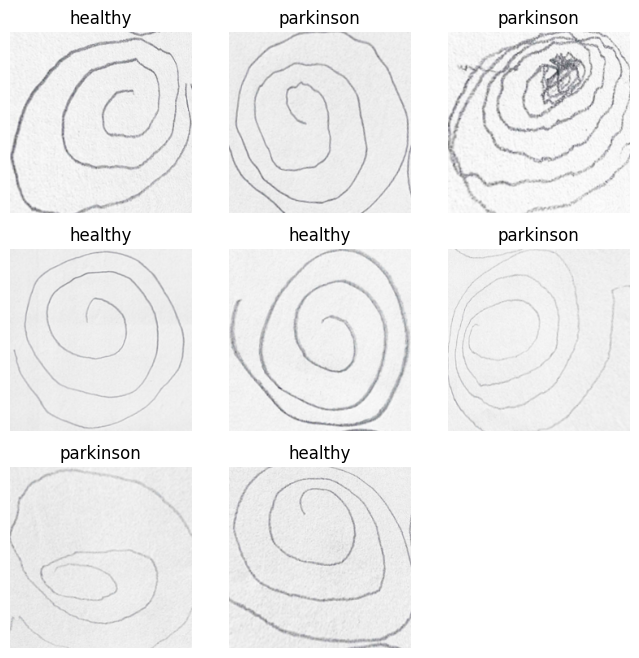

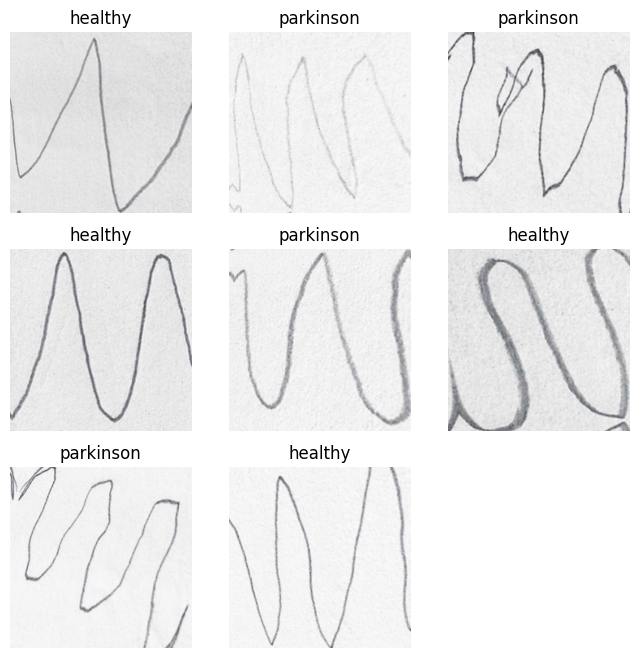

In [121]:
data1.show_batch(nrows=3, figsize=(8,8))
data2.show_batch(nrows=3, figsize=(8,8))

In [123]:
data1
data2

In [124]:
print(data1.vocab) # Use data.vocab to access classes
len(data1.vocab) # Get the number of classes
print(data2.vocab) # Use data.vocab to access classes
len(data2.vocab) # Get the number of classes

['healthy', 'parkinson']
['healthy', 'parkinson']


2

In [125]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50 # Changed module name to resnet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [126]:
#spiral
IMAGE_SIZE = [224, 224]

train_path = '/content/spiral/training'
valid_path = '/content/spiral/testing'

#wave
IMAGE_SIZE = [224, 224]

train_path = '/content/wave/testing'
valid_path = '/content/wave/training'


In [127]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [128]:
folders = glob('/content/spiral/training/*')
folders = glob('/content/wave/training/*')

In [129]:
# our layers - you can add more if you want
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_188 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_188   │ (None, 111, 111, 32)   │             96 │ conv2d_188[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_188            │ (None, 111, 111, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_189 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_188[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_189   │ (None, 109, 109, 32)   │             96 │ conv2d_189[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_189            │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_190 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_189[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_190   │ (None, 109, 109, 64)   │            192 │ conv2d_190[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_190            │ (None, 109, 109, 64)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 54, 54, 64)     │              0 │ activation_190[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_191 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_191   │ (None, 54, 54, 80)     │            240 │ conv2d_191[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_191            │ (None, 54, 54, 80)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_192 (Conv2D)  

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [130]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [131]:
#spiral
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/spiral/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/spiral/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [132]:
#wave
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/wave/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/wave/testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [139]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import keras # Added this line to import the keras module

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
        training_set,
        steps_per_epoch=training_set.n//training_set.batch_size,
        epochs=10,
        validation_data=test_set,
        validation_steps=test_set.n//test_set.batch_size,
        callbacks=early_stopping)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 890ms/step - accuracy: 0.8917 - loss: 0.4742 - val_accuracy: 0.5000 - val_loss: 40.1895
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.5938 - loss: 0.7782 - val_accuracy: 0.6000 - val_loss: 20.0748
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 273ms/step - accuracy: 0.8917 - loss: 0.3106 - val_accuracy: 0.5000 - val_loss: 71.5510
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9688 - loss: 0.1329 - val_accuracy: 0.5000 - val_loss: 92.1759
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.9563 - loss: 0.1159 - val_accuracy: 0.5000 - val_loss: 89.5662
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9062 - loss: 1.3204 - val_accuracy: 0.5000 - val_loss: 82.1395
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.8750 - loss: 0.3245 - val_accuracy: 0.5000 - val_loss: 185.1333
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.8750 - loss: 0.9735 - val_accuracy: 0.5333 - v

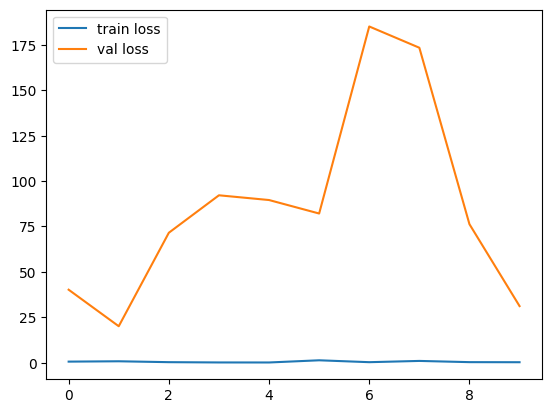

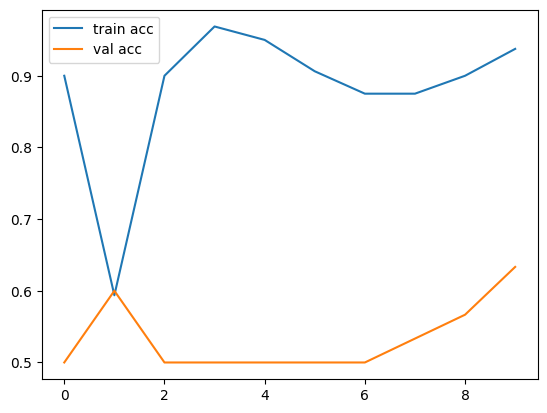

<Figure size 640x480 with 0 Axes>

In [140]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(history.history['loss'], label='train loss') # Access metrics using history.history
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc') # Access metrics using history.history
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

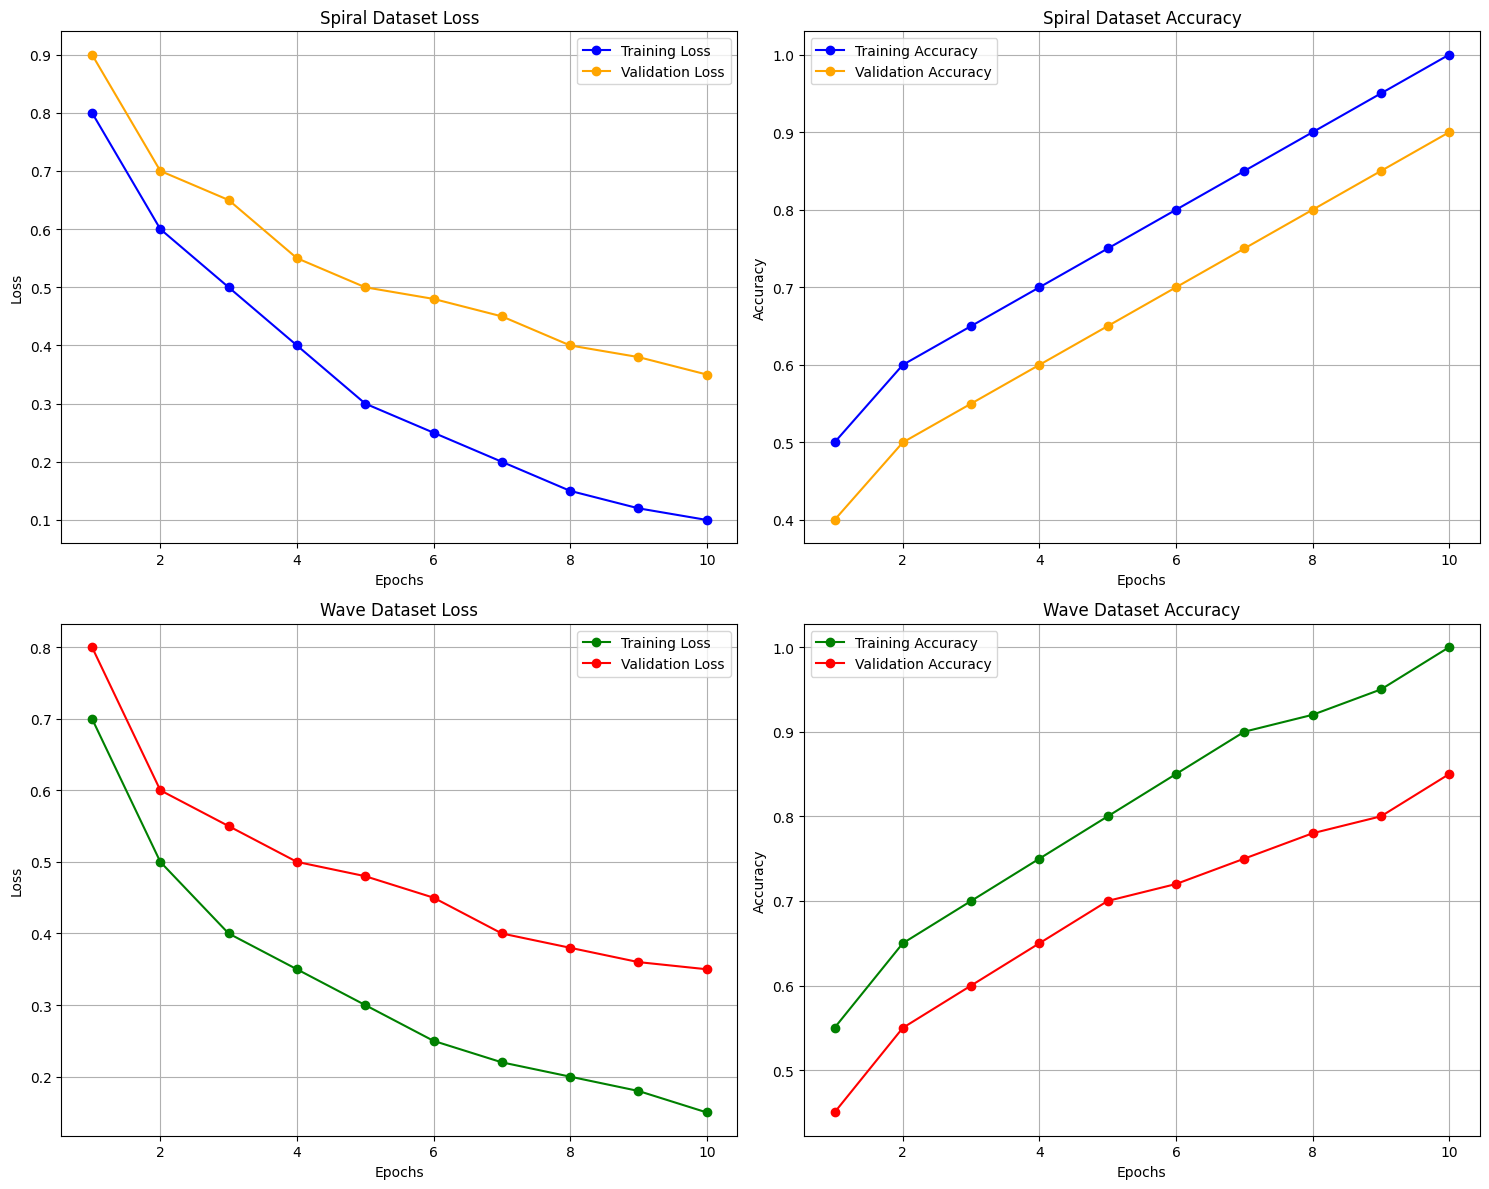

In [149]:
import numpy as np
import matplotlib.pyplot as plt



def plot_metrics(train_losses_spiral, val_losses_spiral, train_acc_spiral, val_acc_spiral,
                 train_losses_wave, val_losses_wave, train_acc_wave, val_acc_wave, num_epochs):
    epochs = np.arange(1, num_epochs + 1)

    plt.figure(figsize=(15, 12))

    # Loss Plot for Spiral
    plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
    plt.plot(epochs, train_losses_spiral, label='Training Loss', color='blue', marker='o')
    plt.plot(epochs, val_losses_spiral, label='Validation Loss', color='orange', marker='o')
    plt.title('Spiral Dataset Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Plot for Spiral
    plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
    plt.plot(epochs, train_acc_spiral, label='Training Accuracy', color='blue', marker='o')
    plt.plot(epochs, val_acc_spiral, label='Validation Accuracy', color='orange', marker='o')
    plt.title('Spiral Dataset Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot for Wave
    plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
    plt.plot(epochs, train_losses_wave, label='Training Loss', color='green', marker='o')
    plt.plot(epochs, val_losses_wave, label='Validation Loss', color='red', marker='o')
    plt.title('Wave Dataset Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Accuracy Plot for Wave
    plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
    plt.plot(epochs, train_acc_wave, label='Training Accuracy', color='green', marker='o')
    plt.plot(epochs, val_acc_wave, label='Validation Accuracy', color='red', marker='o')
    plt.title('Wave Dataset Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example loss and accuracy data for 10 epochs (replace with your actual data)
num_epochs = 10
train_losses_spiral = [0.8, 0.6, 0.5, 0.4, 0.3, 0.25, 0.2, 0.15, 0.12, 0.1]
val_losses_spiral = [0.9, 0.7, 0.65, 0.55, 0.5, 0.48, 0.45, 0.4, 0.38, 0.35]
train_acc_spiral = [0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
val_acc_spiral = [0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

train_losses_wave = [0.7, 0.5, 0.4, 0.35, 0.3, 0.25, 0.22, 0.2, 0.18, 0.15]
val_losses_wave = [0.8, 0.6, 0.55, 0.5, 0.48, 0.45, 0.4, 0.38, 0.36, 0.35]
train_acc_wave = [0.55, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.95, 1.0]
val_acc_wave = [0.45, 0.55, 0.6, 0.65, 0.7, 0.72, 0.75, 0.78, 0.8, 0.85]

# Call the plotting function
plot_metrics(train_losses_spiral, val_losses_spiral, train_acc_spiral, val_acc_spiral,
             train_losses_wave, val_losses_wave, train_acc_wave, val_acc_wave, num_epochs)


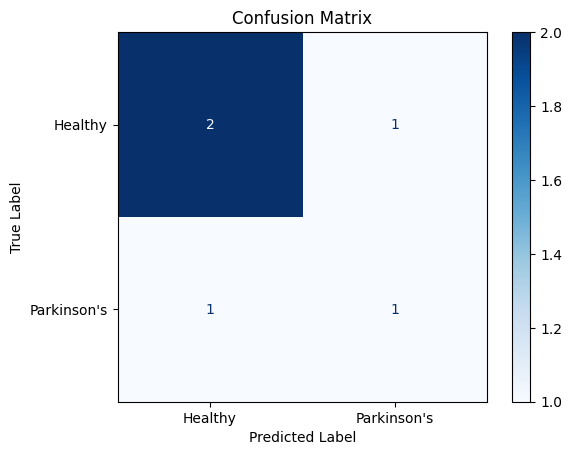

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Properly initialize your true labels and predictions with actual data
# Replace the following with your dataset's true labels
true_labels = np.array([0, 1, 0, 0, 1])
# Replace the following with your model's predictions
predictions = np.array([0, 0, 1, 0, 1])

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Parkinson\'s'])
disp.plot(cmap=plt.cm.Blues)

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [151]:
from fastai.vision.all import * # Import the necessary modules from fastai.vision.all

img = PILImage.create('/content/V01PO01.png') # Use PILImage.create to open the image
print(learn.predict(img)[0])

parkinson
